# Ansambelõpe (*ensemble learning*)


## Sisukord

* [Juhuslik mets](#rnd_forest)
* [Ülesanne 8.1](#8_1)
* [Ansambliõppe teooria](#ensemble)
* [Bagging](#bagging)
* [AdaBoost](#AdaBoost)
* [Ülesanne 8.2](#8_2)

Põhineb S.Raschka *Python Machine Learnig* raamatu [peatükil 7](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch07) ([*MIT litsents*](https://github.com/rasbt/python-machine-learning-book/blob/master/LICENSE.txt)).

<a id='rnd_forest'></a>
## Juhuslik mets (*random forest*)

Moodul [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble) pakub erinevaid ansambelõppe meetodeid.

[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
tekitab otsustuspuude metsa, kus otsustuspuude erinevuse saavutamiseks treenitakse neid erinevate andmevalimitega. Ansambelõppega seotud argumendid on:

* `n_estimators`: Puude arv metsas. Vaikimisi 100.
* `bootstrap`: True / False. Kas kasutada treeninguks alamandmestikku või kõiki andmeid? Vaikimisi True (alamandmestik).


In [151]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

wine_bunch = load_wine()

# Lihtsustuseks kasutame ainult kahte klassi: 1 ja 2
in_classes_12 = (wine_bunch.target != 0) 
X = wine_bunch.data[in_classes_12][:, :4]
y = wine_bunch.target[in_classes_12]

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf_pipe = Pipeline([('sc1', StandardScaler()),
                     ('rf', RandomForestClassifier(n_estimators=10))])

clf_pipe.fit(X_train, y_train)
print("Attr tähtsused:", clf_pipe.named_steps["rf"].feature_importances_)
print("Täpsus:", clf_pipe.score(X_test, y_test))

Attr tähtsused: [0.3501896  0.32934802 0.1507339  0.16972848]
Täpsus: 0.8666666666666667


<a id='8_1'></a>
## Ülesanne 8.1

Laadige alla ülesandes 4.1 vaadeldud [loomaaia andmestik](https://archive.ics.uci.edu/ml/datasets/zoo). Võtke jälle veerg predator ennustatavaks klassiks Y. Looge andmetabel X, millest on eemaldatud klassile vastav veerg predator ja mittearvulised veerud animal_name ja type.
Normaliseerige andmed klassi [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) abil ja jagage treening- ja testandmeteks. Treenige [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) ansambel-klassifikaator 100 puu jaoks ja leida selle täpsus.

In [184]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
columns = ["hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type"]
zoo = pd.read_csv("zoo.data", index_col=0, names=columns)
y = zoo.predator
X = zoo.drop(["predator", "type"], axis=1)  # animal_name not defined in columns to begin with
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf_pipe = Pipeline([('sc1', MinMaxScaler()),
                     ('rf', RandomForestClassifier())])

clf_pipe.fit(X_train, y_train)
print("Attr tähtsused:", clf_pipe.named_steps["rf"].feature_importances_)
print("Täpsus:", clf_pipe.score(X_test, y_test)) # Täpsus on  65-70% kandis

          hair  feathers  eggs  milk  airborne  aquatic  toothed  backbone  \
aardvark     1         0     0     1         0        0        1         1   
antelope     1         0     0     1         0        0        1         1   
bass         0         0     1     0         0        1        1         1   
bear         1         0     0     1         0        0        1         1   
boar         1         0     0     1         0        0        1         1   
...        ...       ...   ...   ...       ...      ...      ...       ...   
wallaby      1         0     0     1         0        0        1         1   
wasp         1         0     1     0         1        0        0         0   
wolf         1         0     0     1         0        0        1         1   
worm         0         0     1     0         0        0        0         0   
wren         0         1     1     0         1        0        0         1   

          breathes  venomous  fins  legs  tail  domestic  catsi

C:\Users\envomp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<a id='ensemble'></a>
## Ansambelõppe teooria

Vaatame lihtsustatud juhtu kui meil on kaks võimalikku klassi ja $n$ klassifikaatorit. Eeldame lihtsustatult, et kõik klassifikaatorid ennustavad klassi 0 tõenäosusega p ja järelikult klassi 1 tõenäosusega 1-p ja klassifikaatorite ennustused ei sõltu üksteisest. Tõenäosusmõõt näitab kui suure tõenäosusega on klassi 0 ennustavate klassifikaatorite arv $x=k$ ja see on tõenäosusteooriast tuntud binoomjaotus.

$$ P(x=k) = \binom{n}{k} p^k (1-p)^{n-k}$$

 $\binom{n}{k}$ : $k$ elemendiliste alamhulkade arv $n$ elemendi hulgast. 

In [153]:
0.6**3 * 0.4**2

0.03456

In [154]:
import numpy as np
from scipy.special import comb
import math

#print(comb(5, 3))

# Defineerime tõnäosusmõõdu funktsiooni
def p_mass(n, k, p): return comb(n, k) * p**k * (1-p)**(n-k)



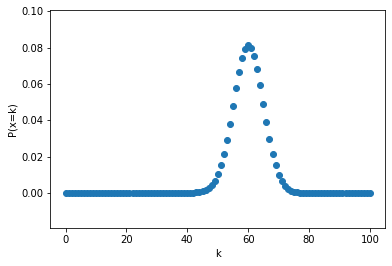

In [155]:
# Joonistame tõenäosusmõõdu graafiku juhu jaoks, kui meil on 10 klassifikaatorit st n=100 
# ja need ennustavad klassi 0 tõenäosusega 0.6


import matplotlib.pyplot as plt
%matplotlib inline

n = 100
p = 0.6
# Klassi 0 ennustavate klassifikaatorite arv
n_clf = np.arange(0, n+1)
probs = [p_mass(n, x, p) for x in n_clf]

plt.scatter(n_clf, probs)
plt.xlabel("k")
plt.ylabel("P(x=k)")
plt.show()

Kui eeldame, et kõik klassifikaatorid teevad vigase ennustuse tõenäosusega $\epsilon$ ja nende ennustused ei sõltu üksteisest. Ansambel ennustab teatud klassi kui vähemalt $y$ klassifikaatorit ($y$ on tavaliselt pool klassifikaatorite arvust) ennustavad seda klassi.  Kuidas sõltub ansambli vigase ennustuse tõenäosus klassifikaatori vea tõenäosusest $\epsilon$?

$$ P(x\geq y) = \sum_{k=y}^{n} P(x=k)$$

Selle saame võttes $P(x=k)$ valemis tõenäosuseks $p$ vea tõenäosuse $\epsilon$.

$$ P(x\geq y) = \sum_{k=y}^{n} \binom{n}{k} \epsilon^k (1-\epsilon)^{n-k}$$


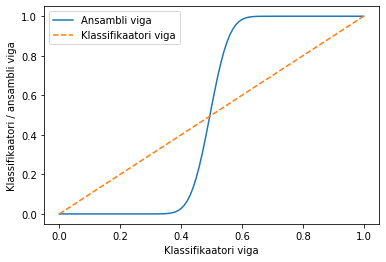

In [156]:
# Defineerime vastava funktsiooni

def ensemble_error(n, epsilon):
    y = math.ceil(n/2) # tavaline ennustuslävi, pooled klassifikaatorid, ümardada üles (ceil)
    return sum([p_mass(n, k, epsilon) for k in range(y, n+1)])
    

#print(ensemble_error(100, 0.5))

# Joonistame vastava graafiku
error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n, e) for e in error_range]

plt.plot(error_range, ens_errors, label="Ansambli viga")
plt.plot(error_range, error_range, linestyle="--", label="Klassifikaatori viga")
plt.xlabel("Klassifikaatori viga")
plt.ylabel("Klassifikaatori / ansambli viga")
plt.legend(loc='upper left')
plt.show()

Näeme, et juba juhul kui klassifikaatori viga on 0.4 või väiksem, on ansambelõppe abil võimalik tulemusi radikaalselt parandada. Tasub vaadata, mis juhtub kui klassifikaatorite arvu $n$ ansamblis   suurendada. Muidugi ei pruugi kõik eelnevad eeldused, nagu klassifikaatorite sõltumatus, praktikas kehtida.

<a id='bagging'></a>
## Bagging

Ansambelõppe klassifikaator [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) moodulist [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble) treenib etteantud  klassifikaatorit `base_estimator n_estimators` erineva alamvalimiga. Alamvalimid on tüüpiliselt leitud nn tagasipanekuga valiku (*sampling with replacement*) meetodil, mille korral sama algse valimi objekt võib esineda juhuvalimis mitu korda, sest valitud objekt pannakse juhuvalimisse "tagasi" ja võib uuesti valituks osutuda. Muud olulised argumendid:
* `bootstrap`: kas kasutada juhuvalimite genereerimiseks tagasipanekuga valikut. Vaikimisi True.
* `bootstrap_features`: kas valida lisaks objektidele ka alamhulk atribuutidest? Vaikimisi False.
* `max_samples`: juhuvalimi suurus võrreldes tervikvalimiga. Vaikimisi 1.0.
* `max_features`: juhuvalimi atribuutide arv võrreldes tervikvalimiga. Vaikimisi 1.0.

In [157]:
from sklearn.linear_model import Perceptron


clf_prp = Perceptron(max_iter=40)
clf_pipe_b = Pipeline([('sc1', StandardScaler()),
                       ('bc', BaggingClassifier(base_estimator=clf_prp,
                                                n_estimators=100,
                                                bootstrap_features=True))])

clf_pipe_b.fit(X_train, y_train)
print("Täpsus:", clf_pipe_b.score(X_test, y_test))

Täpsus: 0.7419354838709677


<a id='AdaBoost'></a>
## AdaBoost

[AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) ansambelõppe meetod moodulist [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble) hindab eelmisel treeningraundil valesti klassifitseeritud elemente uuel raundil kaalukamaks. Vaikimisi on õpetatavateks klassifikaatoriteks `base_estimator` otsustuspuu "kännud": `DecisionTreeClassifier(max_depth=1)`.



In [158]:
clf_pipe_ab = Pipeline([('sc1', StandardScaler()),
                       ('ab', AdaBoostClassifier(n_estimators=10))])

clf_pipe_ab.fit(X_train, y_train)
print("Täpsus:", clf_pipe_ab.score(X_test, y_test))

Täpsus: 0.7096774193548387


AdaBoosti klassifikaatori hinnang on:
$$F_T(x) = \sum_{t=1}^T f_t(x)$$
$T$ on klassifikaatorite arv ansamblis
$x$ on objekt (vektor)
$t$ on iteratsioon
$f_t(x)$ on komponenklassifikaatori koguhinnang
$$ f_t(x) = \alpha_t h(x)$$,
kus $\alpha_t$ on teatud konstant iteratsiooni $t$ jaoks ja $h(x)$ on vastava klassifikaatori ennustus.


Konstant $\alpha_t$ ja klassifikaator leitakse iteratsiooni jaoks nii, et minimeerida summaarset treeningviga:

$$ E_t = \sum_i E(F_{t-1} + \alpha_t h(x_i)) $$
, kus $E()$ on teatud veafunktsioon.

Objekti $i$ kaal iteratsiooni $t$ jaoks on 
$$ w_{it} = E (F_{t-1}(x_i)) $$

<a id='8_2'></a>
## Ülesanne 8.2

Treenige [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) koos [LogisticRegression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) baasklassifikaatoritega ja [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) ansambel-klassifikaatorid ülesandes 8.1 vaadeldud andmestiku peal ja leidke nende täpsused.  Võrrelge täpsust omavahel ja ülesande 8.1 tulemusega. Milline ansambelõppe meetod on täpseim?

In [234]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression(penalty='l2', max_iter=3000, random_state=0, solver='sag')

clf_pipe = Pipeline([
                    ('sc1', StandardScaler()),
                    ('bgc', BaggingClassifier(base_estimator=regression, n_estimators=100, bootstrap_features=True)),
                    ])

clf_pipe.fit(X_train, y_train)
print("Täpsus:", clf_pipe.score(X_test, y_test)) # Täpsus on  65-70% kandis

clf_pipe = Pipeline([
                     ('sc1', StandardScaler()),
                     ('ab', AdaBoostClassifier(n_estimators=10))
                    ])

clf_pipe.fit(X_train, y_train)
print("Täpsus:", clf_pipe.score(X_test, y_test)) # Täpsus on  70% kandis

print("Protsendid tulid laias laastus kõik samad. 65% ja 70% vahel. Aga AdaBoostClassifier andis keskmisest paremaid tulemusi.")

Täpsus: 0.6774193548387096
Täpsus: 0.7096774193548387
Protsendid tulid laias laastus kõik samad. 65% ja 70% vahel. Aga AdaBoostClassifier andis keskmisest paremaid tulemusi.
